In [1]:
import glob, os
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack
import matplotlib as mpl
from astropy import units as u

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 200
plt.rc('font', family='serif')

# Filter Response Curve
- Put to the speclite class

- Read response curve table

In [3]:
rsptbl = ascii.read('../3.table/7dt.filter.response.realistic_optics.ecsv')
rsptbl

index,name,lam,centerlam,bandwidth,response
,,Angstrom,Angstrom,Angstrom,
int64,str4,float64,float64,float64,float64
0,m400,1000.0,4000.0,250.0,0.0
0,m400,1009.0,4000.0,250.0,0.0
0,m400,1018.0,4000.0,250.0,0.0
0,m400,1027.0,4000.0,250.0,0.0
0,m400,1036.0,4000.0,250.0,0.0
0,m400,1045.0,4000.0,250.0,0.0
0,m400,1054.0,4000.0,250.0,0.0
0,m400,1063.0,4000.0,250.0,0.0


- single med-band

In [4]:
filterlist = np.unique(rsptbl['name'])
filte = filterlist[0]
filte

'm400'

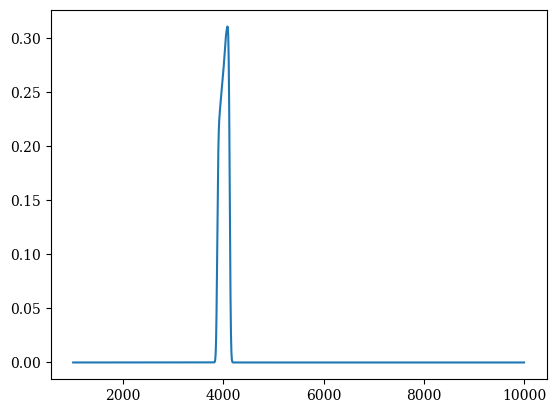

In [5]:
#	Filter Table
fltbl = rsptbl[rsptbl['name']==filte]
fltbl
plt.plot(fltbl['lam'], fltbl['response'])

- put to the speclite class

In [6]:
import speclite.filters

In [7]:
medfilter = speclite.filters.FilterResponse(
	wavelength = fltbl['lam'],
	response = fltbl['response'], meta=dict(group_name='med', band_name=filte)
)
medfilter

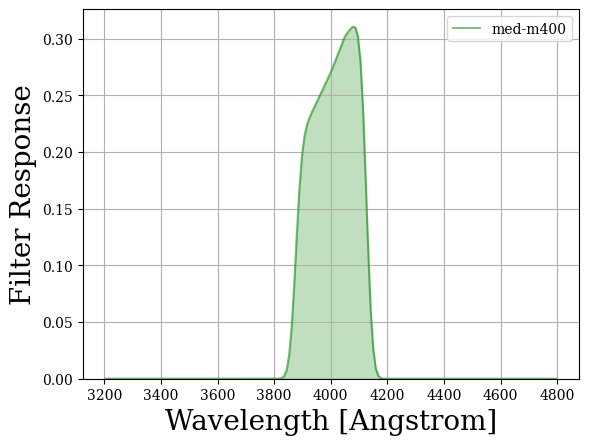

In [8]:
fangs = speclite.filters.load_filters(f'med-{filte}')
speclite.filters.plot_filters(fangs)

- Put all med-band list to the speclite class

In [9]:
#	convert to list
filterlist = list(filterlist)
filterlist[0:5]

['m400', 'm425', 'm450', 'm475', 'm500']

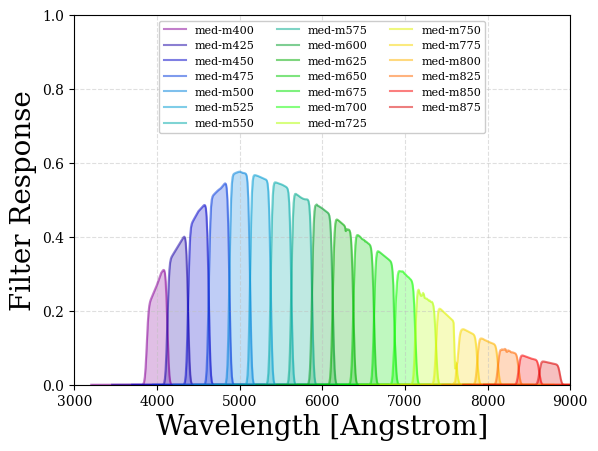

In [10]:
for filte in filterlist:
	#	Filter Table
	fltbl = rsptbl[rsptbl['name']==filte]

	_ = speclite.filters.FilterResponse(
		wavelength = fltbl['lam'],
		response = fltbl['response'], meta=dict(group_name='med', band_name=filte)
	)

#	New name for speclite class
mfilterlist = [f"med-{filte}" for filte in filterlist]

#	Medium filters
meds = speclite.filters.load_filters(*mfilterlist)
speclite.filters.plot_filters(meds)
plt.legend(loc='upper center', ncol=3, fontsize=8, framealpha=1.0)
plt.ylim([0, 1.00])
plt.xlim([3000, 9000])
plt.grid('both', ls='--', c='silver', alpha=0.5)

# Spectrum

In [11]:
specmdls = sorted(glob.glob("../3.table/kn_sim_cube_v1/*spec*.dat"))
specmdls[0:10]

['../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.05_spec_2020-03-19.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.15_spec_2020-05-24.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.3_spec_2020-03-10.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.003_vw0.05_spec_2020-04-09.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.003_vw0.15_spec_2020-05-24.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.003_vw0.3_spec_2020-04-09.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.01_vw0.05_spec_2020-03-19.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.01_vw0.15_spec_2020-05-24.dat',
 '../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.01_vw0.3_spec_2020-03-10.dat',
 '../3.

In [12]:
spmdl = specmdls[0]
spmdl

'../3.table/kn_sim_cube_v1/Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.05_spec_2020-03-19.dat'

In [13]:
sptbl = ascii.read(spmdl)
sptbl[:5]

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1e-05,1.0047e-05,0.00010256,0.000101585,9.9135e-05,9.46562e-05,8.98205e-05,8.69291e-05,8.63167e-05,8.02315e-05,7.88266e-05,7.35116e-05,7.13724e-05,6.79792e-05,6.46325e-05,6.12394e-05,6.22092e-05,5.79724e-05,5.62445e-05,5.34613e-05,5.06864e-05,4.67779e-05,4.84974e-05,4.75032e-05,4.29607e-05,4.61508e-05,4.39938e-05,4.38748e-05,4.45292e-05,4.31402e-05,4.42695e-05,4.6581e-05,4.7525e-05,4.89333e-05,4.76984e-05,5.42631e-05,5.41489e-05,5.81661e-05,6.12681e-05,6.22359e-05,6.66985e-05,7.31607e-05,7.33298e-05,8.10351e-05,8.09365e-05,8.47781e-05,9.07023e-05,9.48351e-05,0.000100745,0.000108601,0.00011159,0.000115585,0.000116081,0.000126272,0.000126636,0.000134352
1.0047e-05,1.0095e-05,5.28218e-06,5.73466e-06,5.36856e-06,5.57242e-06,4.66126e-06,4.55073e-06,4.35625e-06,3.82455e-06,4.33313e-06,4.12498e-06,4.46257e-06,4.75926e-06,4.76098e-06,4.89447e-06,4.27125e-06,4.92262e-06,4.86734e-06,4.95018e-06,4.54557e-06,5.20319e-06,4.65838e-06,4.80353e-06,4.35931e-06,4.11856e-06,4.61903e-06,4.10897e-06,4.84308e-06,4.31281e-06,4.16278e-06,4.32886e-06,5.21894e-06,4.79846e-06,4.02185e-06,3.95936e-06,4.56844e-06,4.43789e-06,4.84239e-06,4.38438e-06,4.62042e-06,4.70652e-06,4.05975e-06,4.62711e-06,4.53284e-06,3.54355e-06,4.20283e-06,3.85781e-06,4.23939e-06,4.66695e-06,5.11748e-06,5.03424e-06,5.22645e-06,5.26499e-06,5.31354e-06,5.51217e-06
1.0095e-05,1.0143e-05,5.68171e-06,6.00535e-06,5.76423e-06,5.13588e-06,5.45709e-06,5.40467e-06,5.09933e-06,4.8766e-06,4.29302e-06,4.8259e-06,4.35215e-06,4.34118e-06,4.69808e-06,4.51673e-06,4.87534e-06,5.02454e-06,4.28168e-06,4.25561e-06,4.46502e-06,4.48748e-06,4.33525e-06,4.34474e-06,4.40536e-06,3.88943e-06,4.25018e-06,3.96067e-06,3.87034e-06,4.13599e-06,3.89785e-06,4.52917e-06,3.43709e-06,4.45497e-06,3.95719e-06,4.14685e-06,3.89669e-06,4.45014e-06,4.183e-06,4.58354e-06,5.52662e-06,4.33171e-06,5.31888e-06,3.93982e-06,4.29983e-06,4.88932e-06,4.71703e-06,4.39679e-06,4.92096e-06,5.3859e-06,5.52855e-06,5.63539e-06,6.29636e-06,5.8366e-06,6.48582e-06,6.23448e-06
1.0143e-05,1.0191e-05,7.42547e-06,6.77337e-06,6.28805e-06,6.80327e-06,6.02362e-06,5.66615e-06,5.47925e-06,5.22189e-06,4.86947e-06,4.44316e-06,5.1253e-06,5.23829e-06,5.34105e-06,4.43748e-06,4.84375e-06,3.78838e-06,4.26152e-06,4.11598e-06,3.96635e-06,4.05318e-06,4.21133e-06,4.10965e-06,4.4523e-06,3.6048e-06,4.40931e-06,4.17248e-06,3.79943e-06,3.45154e-06,3.51532e-06,3.49874e-06,3.67555e-06,4.27289e-06,4.37201e-06,3.85552e-06,4.07497e-06,3.86321e-06,4.28625e-06,4.65889e-06,4.47484e-06,4.88204e-06,4.7766e-06,4.90515e-06,5.02166e-06,4.77279e-06,5.28095e-06,5.51054e-06,5.68241e-06,6.36458e-06,6.21407e-06,6.10488e-06,6.04264e-06,6.33165e-06,7.04701e-06,6.88077e-06
1.0191e-05,1.024e-05,6.98161e-06,6.93879e-06,6.66278e-06,6.30314e-06,6.1115e-06,5.78465e-06,5.61972e-06,5.13506e-06,5.93683e-06,5.58654e-06,5.20813e-06,5.42461e-06,4.9499e-06,4.4657e-06,4.30258e-06,3.96758e-06,4.13614e-06,4.25728e-06,4.49594e-06,4.49344e-06,3.63952e-06,3.70821e-06,3.77432e-06,3.43393e-06,3.40739e-06,2.90638e-06,3.37206e-06,3.68753e-06,3.66063e-06,3.48635e-06,3.00994e-06,3.54209e-06,3.69449e-06,3.91321e-06,3.82549e-06,4.22616e-06,3.74485e-06,4.73395e-06,4.03413e-06,4.62528e-06,4.36084e-06,5.3044e-06,5.56287e-06,5.27237e-06,6.20368e-06,5.38347e

The model name has model properties, for example: 

Run_TS_dyn_all_lanth_wind1_all_md0.03_vd0.3_mw0.003_vw0.05_lums_2020-04-25.dat
- a luminosity file
- produced on 4/25/2020
- toroidal (T) low-Ye ejecta
- spherical (S) high-Ye ejecta
- "Wind 1" high-Ye composition (wind1)
- 0.03 M⊙ and 0.3c low-Ye ejecta mass and velocity
- 0.003 M⊙ and 0.05c high-Ye ejecta mass and velocity.

In [14]:
tablelist = []

for ii, spmdl in enumerate(specmdls):
	part = os.path.basename(spmdl).split('_')

	#	Shape
	if part[1] == 'TP':
		dshape = 'toroidal'
	elif part[1] == 'TS':
		dshape = 'spherical'
	else:
		dshape = ''

	#	Latitude
	if part[5] == 'wind1':
		lat = 'Axial'
	elif part[5] == 'wind2':
		lat = 'Edge'
	else:
		lat = ''

	#	Ejecta mass for low-Ye [solar mass]
	md = float(part[7].replace('md', ''))

	#	Ejecta velocity for low-Ye [N*c]
	vd = float(part[8].replace('vd', ''))

	#	Ejecta mass for high-Ye [solar mass]
	mw = float(part[9].replace('mw', ''))

	#	Ejecta velocity for high-Ye [N*c]
	vw = float(part[10].replace('vw', ''))

	#	Table type
	tableType = part[11]

	sptbl = Table(
		data = [[ii], [os.path.basename(spmdl)], [dshape], [lat], [md], [vd], [mw], [vw], [tableType],],
		names = ('number', 'model', 'shape', 'latitude', 'md', 'vd', 'mw', 'vw', 'type'),
		)
	tablelist.append(sptbl)

#	All Spectrum Table
alsptbl = vstack(tablelist)
del sptbl
del tablelist


alsptbl['md'].unit = u.solMass
alsptbl['mw'].unit = u.solMass
alsptbl['vd'].unit = u.lightsecond
alsptbl['vw'].unit = u.lightsecond

alsptbl[:3]

number,model,shape,latitude,md,vd,mw,vw,type
,,,,solMass,lsec,solMass,lsec,
int64,str80,str9,str5,float64,float64,float64,float64,str4
0,Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.05_spec_2020-03-19.dat,toroidal,Axial,0.001,0.05,0.001,0.05,spec
1,Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.15_spec_2020-05-24.dat,toroidal,Axial,0.001,0.05,0.001,0.15,spec
2,Run_TP_dyn_all_lanth_wind1_all_md0.001_vd0.05_mw0.001_vw0.3_spec_2020-03-10.dat,toroidal,Axial,0.001,0.05,0.001,0.3,spec


In [15]:
sedtbl = ascii.read(spmdl)
sedtbl

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1e-05,1.0047e-05,0.00208948,0.00210254,0.00207899,0.00223573,0.00199673,0.00216883,0.00214382,0.00215359,0.00211342,0.0022407,0.00220254,0.00210798,0.00222825,0.0023409,0.00203987,0.00226794,0.00205531,0.002116,0.00211289,0.00198887,0.00223019,0.00205565,0.00223213,0.00213341,0.00205465,0.00208934,0.00215129,0.00208184,0.00201056,0.00220057,0.00199198,0.00224727,0.00207583,0.00212677,0.00218304,0.00220338,0.00210355,0.00215461,0.00203758,0.00207299,0.0020753,0.00206508,0.0021627,0.00208105,0.00208364,0.00206516,0.00212305,0.00216838,0.0021651,0.00226085,0.00213222,0.00203773,0.00220284,0.00210444
1.0047e-05,1.0095e-05,7.16349e-05,0.000101457,5.53056e-05,6.27528e-05,7.62121e-05,8.6381e-05,5.47934e-05,5.70072e-05,6.63491e-05,6.70429e-05,0.000101306,8.92458e-05,6.69256e-05,6.76896e-05,6.67442e-05,0.000101057,6.6077e-05,6.04596e-05,7.44979e-05,5.10199e-05,6.54652e-05,3.78698e-05,0.000107559,6.39821e-05,8.3682e-05,4.94454e-05,7.11724e-05,0.000113335,7.24286e-05,6.92517e-05,5.23884e-05,7.20659e-05,6.76368e-05,6.38482e-05,8.83002e-05,5.89006e-05,6.40027e-05,7.05418e-05,4.68244e-05,5.75827e-05,5.82717e-05,7.7179e-05,5.96132e-05,7.27559e-05,9.52848e-05,7.70156e-05,9.48313e-05,8.48733e-05,8.09492e-05,7.33981e-05,6.79805e-05,8.13609e-05,7.80386e-05,5.75299e-05
1.0095e-05,1.0143e-05,6.91376e-05,5.26869e-05,6.34481e-05,8.40898e-05,5.18168e-05,7.61015e-05,7.96194e-05,8.68661e-05,6.15039e-05,7.51528e-05,6.64685e-05,7.92839e-05,8.01551e-05,7.53851e-05,4.18891e-05,9.3349e-05,8.8525e-05,8.77823e-05,7.42966e-05,4.4732e-05,5.87278e-05,4.00207e-05,7.98631e-05,0.000106283,8.30861e-05,8.13563e-05,6.9998e-05,5.00939e-05,7.28056e-05,6.96533e-05,5.06208e-05,9.4147e-05,5.04026e-05,7.24025e-05,5.61803e-05,7.68321e-05,5.55941e-05,8.09876e-05,6.95656e-05,7.8294e-05,6.78295e-05,6.22179e-05,9.10036e-05,0.0001005,6.96096e-05,6.8479e-05,6.86997e-05,6.80091e-05,6.70251e-05,6.47469e-05,8.81232e-05,7.80877e-05,8.17438e-05,4.35436e-05
1.0143e-05,1.0191e-05,6.5092e-05,6.15807e-05,7.50821e-05,8.65708e-05,7.39093e-05,8.00253e-05,5.29697e-05,7.9964e-05,8.27762e-05,7.21307e-05,6.15825e-05,5.7768e-05,7.57724e-05,6.16501e-05,6.65695e-05,8.27859e-05,5.86183e-05,6.39536e-05,6.22327e-05,6.34285e-05,4.69705e-05,0.000110379,6.92702e-05,6.50429e-05,4.81357e-05,7.02268e-05,6.22504e-05,9.57408e-05,6.72968e-05,7.52394e-05,0.000101958,7.93351e-05,5.01974e-05,8.39906e-05,6.37155e-05,7.2168e-05,4.59525e-05,7.19559e-05,6.92771e-05,0.000104017,4.35612e-05,5.94108e-05,4.87835e-05,8.76577e-05,9.7041e-05,9.89235e-05,7.40433e-05,7.05139e-05,8.26885e-05,7.19864e-05,5.00399e-05,7.66973e-05,7.89662e-05,5.6254e-05
1.0191e-05,1.024e-05,6.22472e-05,8.25824e-05,5.1914e-05,5.39184e-05,8.12307e-05,4.88883e-05,9.40563e-05,6.51863e-05,6.7476e-05,7.7812e-05,7.30132e-05,6.49726e-05,8.31042e-05,9.15779e-05,6.06137e-05,7.2593e-05,6.82627e-05,7.34023e-05,9.72859e-05,5.57951e-05,6.8047e-05,6.68407e-05,5.99829e-05,3.91258e-05,5.24231e-05,7.68542e-05,6.71863e-05,5.12682e-05,9.93822e-05,8.3106e-05,6.70805e-05,8.23336e-05,8.097e-05,8.45428e-05,5.20989e-05,7.36831e-05,5.32261e-05,7.2853e-05,4.77513e-05,7.93437e-05,9.64924e-05,4.21488e-05,6.89768e-05,7.23614e-05,7.85338e-05,4.72457e-05,9.4267e-05,6.53909e-05,8.12011e-05,8.72878e-05,6.25609e-05,8.6143e

- col1, col2 : wavelength bin [cm]
- col3-56    : flux into angular bin at R=10pc [erg/(s*AA*cm2)] --> flam
- Define central wavelength [cm] --> [AA]

In [16]:
sedtbl['lam'] = 1e8*(sedtbl['col1']+sedtbl['col2'])/2.
sedtbl['lam'][:10]

1002.35
1007.1
1011.8999999999999
1016.6999999999999
1021.5500000000001
1026.4
1031.25
1036.1499999999999
1041.1
1046.05


In [17]:
#	Time iteration
its = np.array([float(sedtbl.meta['comments'][i].split('= ')[-1]) for i in range(len(sedtbl.meta['comments']))])
its

array([ 0.125,  0.136,  0.149,  0.162,  0.177,  0.193,  0.21 ,  0.229,
        0.25 ,  0.273,  0.297,  0.324,  0.354,  0.386,  0.42 ,  0.459,
        0.5  ,  0.545,  0.595,  0.648,  0.707,  0.771,  0.841,  0.917,
        1.   ,  1.091,  1.189,  1.297,  1.414,  1.542,  1.682,  1.834,
        2.   ,  2.181,  2.378,  2.594,  2.828,  3.084,  3.364,  3.668,
        4.   ,  4.362,  4.757,  5.187,  5.657,  6.169,  6.727,  7.336,
        8.   ,  8.724,  9.514, 10.375, 11.314, 12.338, 13.454, 14.672,
       16.   , 17.448, 19.027, 20.749, 22.627, 24.675, 26.909])

In [18]:
phasecut = 3.1 # [days]
phase_ranges = its[its<phasecut]
nphase = len(phase_ranges)
print(f"{phase_ranges.min()} - {phase_ranges.max()} days : {nphase} epochs")

0.125 - 3.084 days : 38 epochs


In [19]:
step = len(np.unique(sedtbl['col1']))

#	Lite version of spectrum model
#	Lite version of SED table
lsedtbl = sedtbl[:(nphase+1)*step]
lsedtbl

print(f"{len(sedtbl)} models --> {len(lsedtbl)} models")

64512 models --> 39936 models


In [21]:
len(sedtbl)/step

63.0

In [21]:
its = np.array([float(sedtbl.meta['comments'][i].split('= ')[-1]) for i in range(len(sedtbl.meta['comments']))])
phasecut = 3.1 # [days]
phase_ranges = its[its<phasecut]
nphase = len(phase_ranges)
path_lite = '../3.table/kn_sim_cube_lite'

if not os.path.exists(path_lite):
	os.system(f"mkdir {path_lite}")
else:
	pass

for jj, spmdl in enumerate(specmdls):
	sedtbl = ascii.read(spmdl)
	sedtbl['lam'] = 1e8*(sedtbl['col1']+sedtbl['col2'])/2.
	lsedtbl = sedtbl[:(nphase+1)*step]
	lspmdl = f"{path_lite}/{os.path.basename(spmdl).replace('.dat', '.fits')}"

	lsedtbl.write(lspmdl, format='fits', overwrite=True)

	print(f"[{jj+1}/{len(specmdls)}] {lspmdl}", end='\r')

In [22]:
import time

t0 = time.time()
_ = ascii.read(spmdl)
delt_ori = time.time() - t0

t0 = time.time()
_ = Table.read(lspmdl)
delt_lite = time.time() - t0

print(f"Original : {delt_ori:1.3f} sec\nLite ver : {delt_lite:1.3f} sec\n=>x{(delt_ori/delt_lite):1.3f}")

Original : 2.422 sec
Lite ver : 0.025 sec
=>x96.397


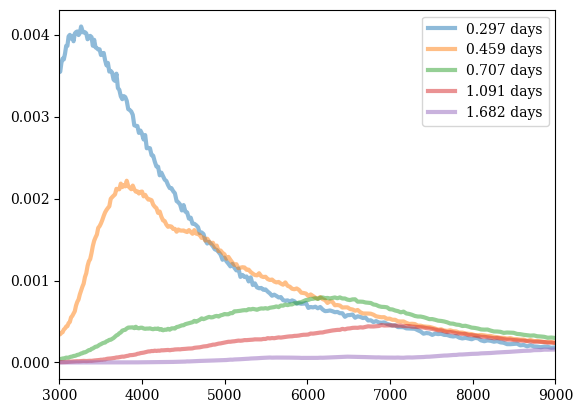

In [56]:
ii = 10
plt.plot(lsedtbl['lam'][1024*ii:1024*(ii+1)], lsedtbl['col3'][1024*ii:1024*(ii+1)], ls='-', lw=3, alpha=0.5, label=f"{its[ii]} days")
ii = 15
plt.plot(lsedtbl['lam'][1024*ii:1024*(ii+1)], lsedtbl['col3'][1024*ii:1024*(ii+1)], ls='-', lw=3, alpha=0.5, label=f"{its[ii]} days")
ii = 20
plt.plot(lsedtbl['lam'][1024*ii:1024*(ii+1)], lsedtbl['col3'][1024*ii:1024*(ii+1)], ls='-', lw=3, alpha=0.5, label=f"{its[ii]} days")
ii = 25
plt.plot(lsedtbl['lam'][1024*ii:1024*(ii+1)], lsedtbl['col3'][1024*ii:1024*(ii+1)], ls='-', lw=3, alpha=0.5, label=f"{its[ii]} days")
ii = 30
plt.plot(lsedtbl['lam'][1024*ii:1024*(ii+1)], lsedtbl['col3'][1024*ii:1024*(ii+1)], ls='-', lw=3, alpha=0.5, label=f"{its[ii]} days")

plt.xlim([3000, 9000])

plt.legend()